<a href="https://colab.research.google.com/github/RafsanJany-44/Machine-School/blob/main/K_fold_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
data = 'https://raw.githubusercontent.com/RafsanJany-44/Machine-School/main/datasets/HMC_WITH_BIOM.csv'
#data="https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv"
dataset = pd.read_csv(data)


#Spliting

In [3]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


$Models with out KFCV

**Logistic Regression,SVM,Random Forest**

In [5]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
print("Logistic Reg Accuracy: ",lr.score(X_test, y_test))


svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print("SVM Accuracy: ",svm.score(X_test, y_test))

rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
print("Random Forest: ",rf.score(X_test, y_test))


Logistic Reg Accuracy:  0.33447149643705465
SVM Accuracy:  0.7357482185273159
Random Forest:  0.7866686460807601


<h2 style='color:purple'>KFold cross validation</h2>

**Basic example**

In [6]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [7]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


<h2 style='color:purple'>cross_val_score function</h2>

In [8]:
from sklearn.model_selection import cross_val_score

**Logistic regression, SVM, Random forest using cross val score**

In [9]:
print("Logistic regression Accurecy for 3 fold:",cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=5))
print("Random Forest Performance Accurecy for 3 fold:",cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=5))
print("SVM Accurecy for 3 fold:",cross_val_score(SVC(gamma='auto'), X, y,cv=5))


Logistic regression Accurecy for 3 fold: [0.3378246  0.3378246  0.23762861 0.3378246  0.3378246 ]
Random Forest Performance Accurecy for 3 fold: [0.61244488 0.57961783 0.38094072 0.56246938 0.63914748]
SVM Accurecy for 3 fold: [0.41842234 0.29568839 0.29274865 0.38290054 0.42969133]


**AVG SCORE**

In [12]:

Kfolds=5
l=list(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=Kfolds))
avg=sum(l)/Kfolds



print("Logistic regression Accurecy for 3 fold:",avg)

Logistic regression Accurecy for 3 fold: 0.31778539931406175


<h2 style='color:purple'>CV Parameter tunning</h2>

In [19]:
from sklearn.linear_model import LogisticRegression

Kfolds=50
Kfolds_range = range (2,Kfolds+1)
scores={}
scores_list = []
for k in Kfolds_range:
  l=list(cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=k))
  avg=sum(l)/k
  scores[k] = avg
  scores_list.append(avg)
  print(str(k)+"/"+str(Kfolds)+" round completed.........................AVG Accurecy: "+str(avg))

2/50 round completed.........................AVG Accurecy: 0.28775110240078394
3/50 round completed.........................AVG Accurecy: 0.30445696068025
4/50 round completed.........................AVG Accurecy: 0.3128343943075276
5/50 round completed.........................AVG Accurecy: 0.31778539931406175
6/50 round completed.........................AVG Accurecy: 0.3211677289644554
7/50 round completed.........................AVG Accurecy: 0.32356828408540494
8/50 round completed.........................AVG Accurecy: 0.32532950075512834
9/50 round completed.........................AVG Accurecy: 0.3267526838611156
10/50 round completed.........................AVG Accurecy: 0.32782949534541894
11/50 round completed.........................AVG Accurecy: 0.32880719841316774
12/50 round completed.........................AVG Accurecy: 0.32949620177289024
13/50 round completed.........................AVG Accurecy: 0.33018128368446836
14/50 round completed.........................AVG Accu

In [21]:

print("The best number of Folds:")
print(list(scores.keys())[scores_list.index(max(scores_list))])

The best number of Folds:
21


Text(0, 0.5, 'AVG Accuracy')

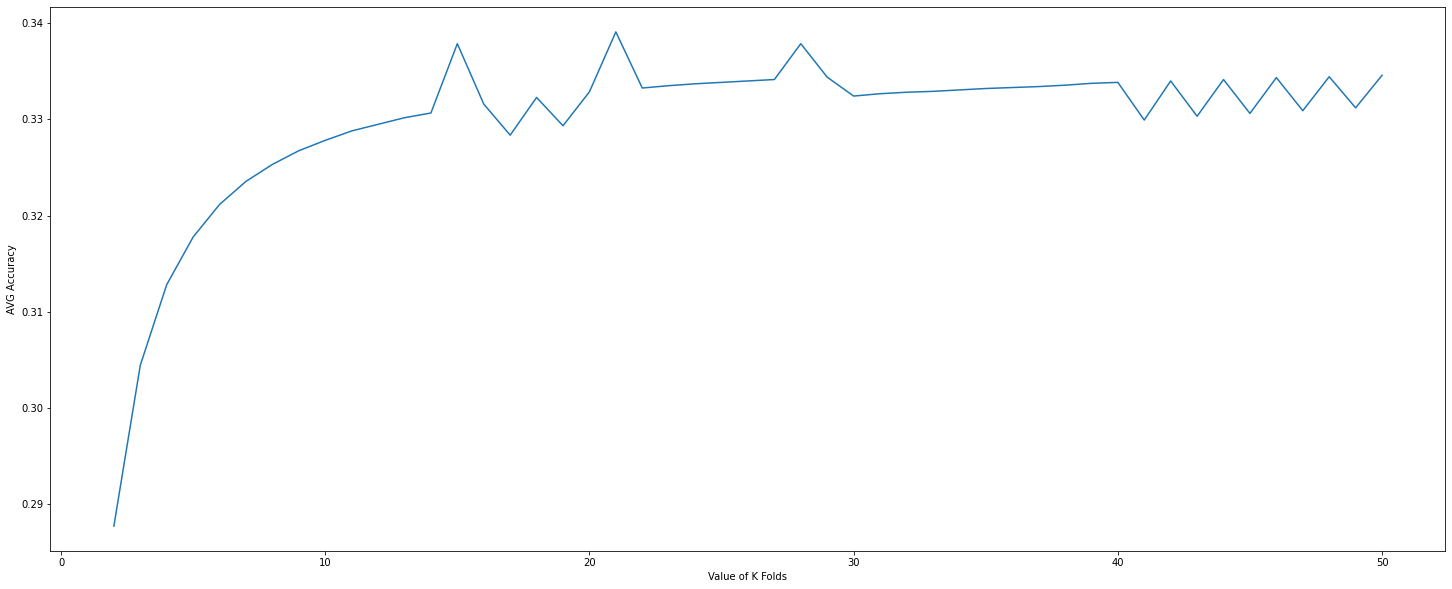

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(Kfolds_range,scores_list)
plt.xlabel('Value of K Folds')
plt.ylabel ('AVG Accuracy')

In [27]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame(dict(
    x = Kfolds_range,
    y = scores_list
))

fig = px.line(df, x="x", y="y", title="K Folds AVG Accuracy") 
fig.show()

In [1]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

np.random.seed(0)

# Artificially add noise to make task harder
df = px.data.iris()
samples = df.species.sample(n=50, random_state=0)
np.random.shuffle(samples.values)
df.loc[samples.index, 'species'] = samples.values

# Define the inputs and outputs
X = df.drop(columns=['species', 'species_id'])
y = df['species']

# Fit the model
model = LogisticRegression(max_iter=200)
model.fit(X, y)
y_scores = model.predict_proba(X)

# One hot encode the labels in order to plot them
y_onehot = pd.get_dummies(y, columns=model.classes_)

# Create an empty figure, and iteratively add new lines
# every time we compute a new class
fig = go.Figure()
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{y_onehot.columns[i]} (AUC={auc_score:.2f})"
    fig.add_trace(go.Scatter(x=fpr, y=tpr, name=name, mode='lines'))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    yaxis=dict(scaleanchor="x", scaleratio=1),
    xaxis=dict(constrain='domain'),
    width=700, height=500
)
fig.show()
